In [2]:
"""
General workflow for importing a new session
"""
subject = 'P01' # TODO: change this for each subject
verbose = True  # change this for debugging

import matplotlib
%matplotlib inline

from pipeline import Pipeline
settings = dict(debug=False, mne_log_level='Info', sfreq=64) # optional pipeline settings
pipeline = Pipeline(subject, settings)

debugging !??


In [3]:
pipeline.load_raw(verbose=verbose)
print('done')

Opening raw data file /Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/mne/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Removing existing average EEG reference projection.
done


540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]


/Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/pipeline.py:301: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(trial_events, raw.info['sfreq'], raw.first_samp, axes=axes)


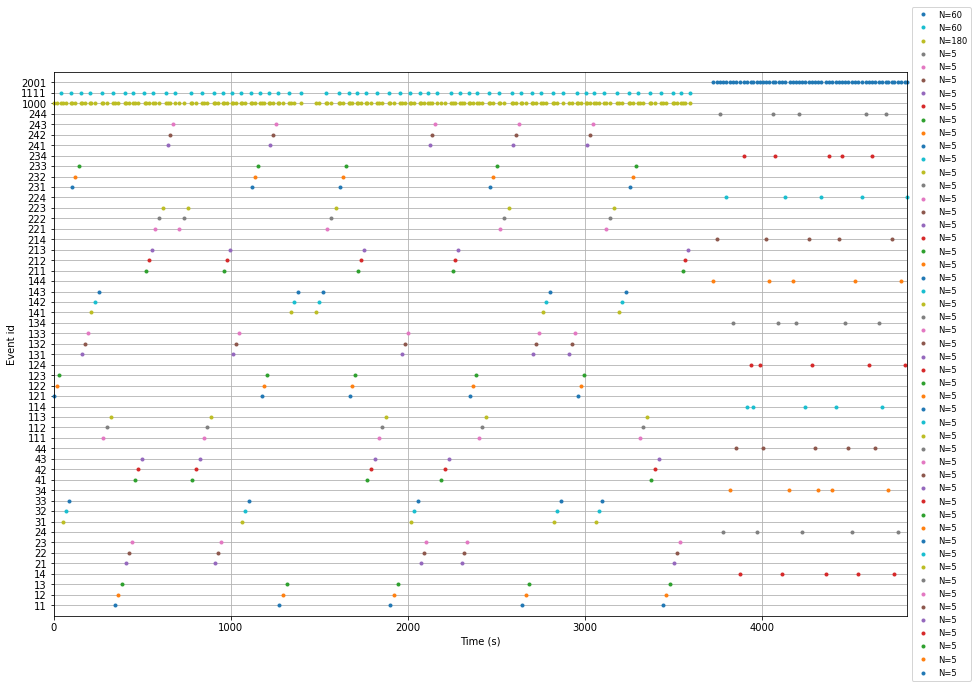

1st event at  1.0
last event at  4820.166015625
540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]


/Users/ahnaaf/Documents/tks/EEG-Shazam/eeg/preprocessing/notebooks/pipeline.py:324: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(merged_events, raw.info['sfreq'], raw.first_samp, axes=axes)


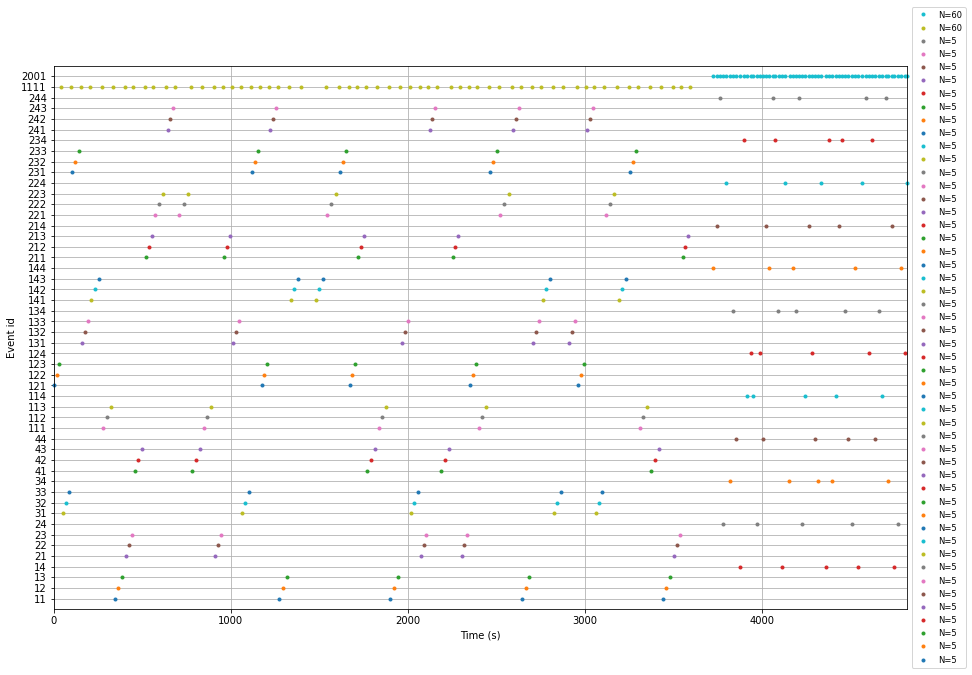

540 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2001]
360 events found
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]


In [4]:
pipeline.check_trial_events()
pipeline.check_trial_audio_onset_merge(use_audio_onsets=True, verbose=None)
pipeline.merge_trial_and_audio_onsets()

In [5]:
pipeline.bandpass_filter()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)



In [6]:
print("going")
pipeline.generate_beat_events() # Note: this includes cue-beats !!!
pipeline.beat_epochs.average().plot();

going
this is the metadata thing {'id': 1, 'label': b'Chim Chim Cheree (lyrics)', 'audio_file': b'S01_Chim Chim Cheree_lyrics.wav', 'cue_file': b'S01_Chim Chim Cheree_lyrics_cue.wav', 'length_with_cue': 14.9657, 'length_of_cue': 1.65, 'length_without_cue': 13.3157, 'length_of_cue_only': 1.9109, 'cue_bpm': 210, 'beats_per_bar': 3, 'num_bars': 16.0, 'cue_bars': 2.0, 'bpm': 213, 'approx_bar_length': 0.8571428571428571}
this is the metadata thing {'id': 2, 'label': b'Take me out to the ballgame (lyrics)', 'audio_file': b'S02_Take Me Out To The Ballgame_lyrics.wav', 'cue_file': b'S02_Take Me Out To The Ballgame_lyrics_cue.wav', 'length_with_cue': 9.5352, 'length_of_cue': 1.867, 'length_without_cue': 7.6682, 'length_of_cue_only': 2.1424, 'cue_bpm': 186, 'beats_per_bar': 3, 'num_bars': 8.0, 'cue_bars': 2.0, 'bpm': 189, 'approx_bar_length': 0.967741935483871}
this is the metadata thing {'id': 3, 'label': b'Jingle Bells (lyrics)', 'audio_file': b'S03_Jingle Bells_lyrics.wav', 'cue_file': b'S03_

TypeError: slice indices must be integers or None or have an __index__ method